In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

<h4>Cargar dataset y seleccionar columnas necesarias</h4>

In [138]:
main_df = pd.read_csv('../data/raw/housing.csv')
main_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [139]:
main_df = main_df[['Latitude', 'Longitude', 'MedInc']]

In [140]:
print(main_df.info())
print(main_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   20640 non-null  float64
 1   Longitude  20640 non-null  float64
 2   MedInc     20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB
None
           Latitude     Longitude        MedInc
count  20640.000000  20640.000000  20640.000000
mean      35.631861   -119.569704      3.870671
std        2.135952      2.003532      1.899822
min       32.540000   -124.350000      0.499900
25%       33.930000   -121.800000      2.563400
50%       34.260000   -118.490000      3.534800
75%       37.710000   -118.010000      4.743250
max       41.950000   -114.310000     15.000100


In [141]:
print(main_df.isnull().sum())
main_df = main_df.dropna()

Latitude     0
Longitude    0
MedInc       0
dtype: int64


In [142]:
print(f"Duplicadas: {main_df.duplicated().sum()}")
main_df = main_df.drop_duplicates()

Duplicadas: 5


<h4>Dividir dataset en train y test</h4>

In [143]:
train_data, test_data = train_test_split(main_df, test_size=0.2, random_state=42)

<h4>Construir K-Means</h4>

In [144]:
X_train = train_data[['Latitude', 'Longitude', 'MedInc']].values
X_test = test_data[['Latitude', 'Longitude', 'MedInc']].values

kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=6, random_state=42)

<h4>Añadir clusters a nueva columna del dataset</h4>

In [145]:
train_data['cluster'] = kmeans.labels_
test_data['cluster'] = kmeans.predict(X_test)

In [146]:
train_data['cluster'] = train_data['cluster'].astype('category')
test_data['cluster'] = test_data['cluster'].astype('category')

In [147]:
train_data.head()

,Latitude,Longitude,MedInc,cluster
19985,36.20,-119.31,3.1453,4
11235,33.81,-117.96,5.2384,1
2271,36.78,-119.80,3.5542,3
8660,33.85,-118.39,4.3594,1
6250,34.04,-117.98,3.4722,1


In [148]:
test_data.head()

,Latitude,Longitude,MedInc,cluster
8572,33.90,-118.41,8.4680,2
1712,37.97,-122.32,3.9722,3
15916,37.74,-122.42,3.4583,3
5196,33.94,-118.27,1.6625,4
13583,34.13,-117.29,1.5156,4


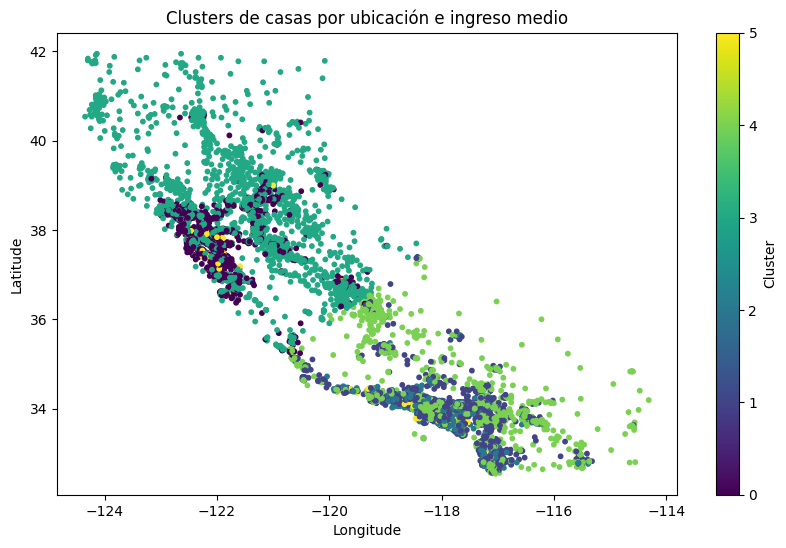

In [149]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(train_data['Longitude'], train_data['Latitude'], 
                       c=train_data['cluster'], cmap='viridis', s=10)
plt.colorbar(scatter, label='Cluster')
plt.title('Clusters de casas por ubicación e ingreso medio')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

La gráfica refleja que los clusters están influenciados tanto por la ubicación geográfica como por las similitudes económicas, creando una segmentación espacial de las viviendas. Además, hay varias concentraciones de puntos en zonas específicas, lo cual refleja regiones densamente pobladas o con características similares.

<h4>Predecir con test</h4>

In [150]:
test_features = test_data[['Latitude', 'Longitude', 'MedInc']].values
test_data['cluster'] = kmeans.predict(test_features)

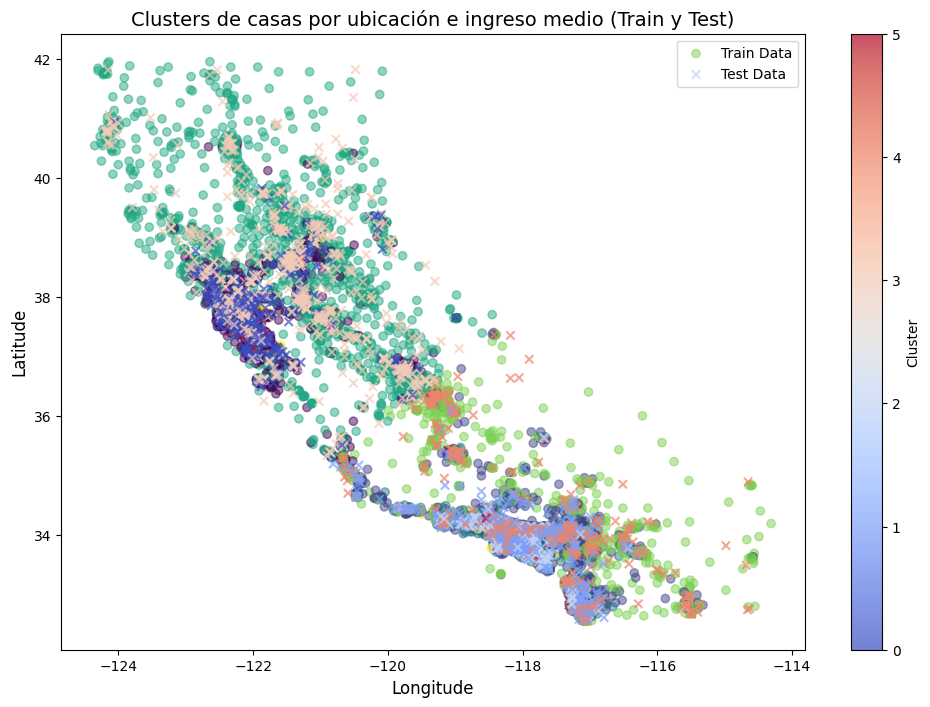

In [151]:
plt.figure(figsize=(12, 8))
plt.scatter(train_data['Longitude'], train_data['Latitude'], 
            c=train_data['cluster'], cmap='viridis', alpha=0.5, label='Train Data')

plt.scatter(test_data['Longitude'], test_data['Latitude'], 
            c=test_data['cluster'], cmap='coolwarm', alpha=0.7, marker='x', label='Test Data')

plt.title('Clusters de casas por ubicación e ingreso medio (Train y Test)', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

<h4>Entrenar con modelo de clasificación supervisada</h4>
En este caso se elige Decission Tree como modelo.

In [152]:
X_train = train_data[['Latitude', 'Longitude', 'MedInc']]
y_train = train_data['cluster']

X_test = test_data[['Latitude', 'Longitude', 'MedInc']]
y_test = test_data['cluster']

In [153]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [154]:
y_pred = model.predict(X_test)

<h4>Medir resultados</h4>

In [161]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       587
           1       0.99      1.00      1.00       995
           2       1.00      0.99      1.00       317
           3       0.99      0.99      0.99      1082
           4       0.99      0.99      0.99      1095
           5       0.96      0.98      0.97        51

    accuracy                           0.99      4127
   macro avg       0.99      0.99      0.99      4127
weighted avg       0.99      0.99      0.99      4127



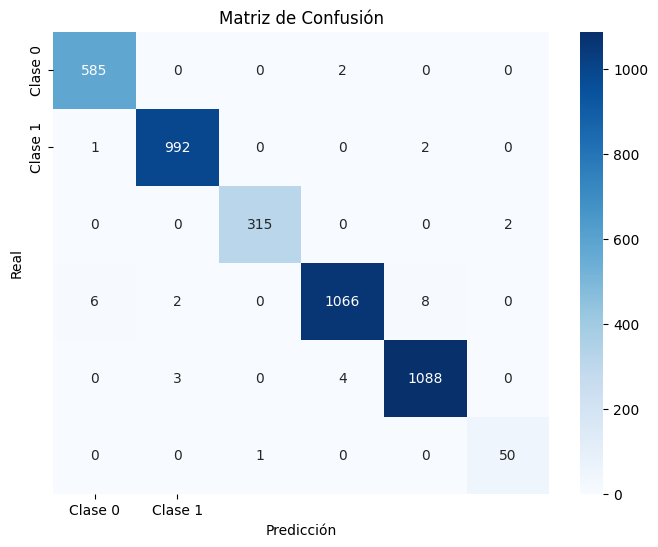

In [156]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')

plt.show()

In [157]:
accuracy_score(y_test, y_pred)

0.992488490428883

In [158]:
feature_importances = pd.DataFrame(
    {'Feature': X_train.columns, 'Importance': model.feature_importances_}
).sort_values(by='Importance', ascending=False)

feature_importances

,Feature,Importance
2,MedInc,0.684697
0,Latitude,0.289049
1,Longitude,0.026255


<h4>Guardar modelo</h4>

In [159]:
joblib.dump(model, 'model.pkl')

['model.pkl']